In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import autokeras as ak
import random
import tensorflow as tf

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
# Set seed to make sure the code to be reproducible
random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

# Data Loading and Preprocessing

In [4]:
Max_log_core_ML   = pd.read_csv("core_interval_ML_maxhamish.csv")
Kom_log_core_ML   = pd.read_csv("core_interval_ML_komie.csv")
Adam_log_core_ML  = pd.read_csv("core_interval_ML_mxadam.csv")

In [5]:
Max_log_core_ML

,Top,Bottom,Median,TOC,S1,S2,S3,Tmax,HI,OI,S2/S3,S1/TOC*100,PI,AF10,AF20,AF30,AF60,AF90,AFCO90,AIBD,AIMR,APDC,APDU,APLC,APLU,APSC,APSU,ASFI,AT10,AT20,AT30,AT60,AT90,ATCO90,BS,CFTC,CNTC,DPHI_DOL,DPHI_LIM,DPHI_SAN,DPHZ,DPO,DRH,DSOZ,FPLC,FPMC,FPSC,GDEV,GR,HBHK,HCAL,HCGR,HDAR,HDRA,HFK,HMIN,HMNO,HSGR,HTEM,HTHO,HURA,LCAL,NDPH,NPHI,NPHI_DOL,NPHI_LIM,NPHI_SAN,NPOR,NPOR_DOL,NPOR_LIM,NPOR_SAN,NRHB,PEFL,PEFSA,PEFZ,RHOM,RHOZ,RSOZ,RT,RXOZ,SIGF,SP,SPAR,STOF,TNPH_DOL,TNPH_LIM,TNPH_SAN,DT_C,DT_S,Vp,Vs,AI,SI
0,2955.50,2955.60,2955.550,3.435,0.884,0.364,0.29,NaN,10.60,8.44,1.26,25.74,0.71,33.23335,51.042759,44.47414,49.24054,61.54362,16.248640,172,0.29069,0.13840,0.20750,0.14092,0.21335,0.17725,0.24770,131.60815,21.91610,31.567289,27.61590,28.03596,30.50794,32.778351,172,2626.33081,4334.76855,0.36248,0.31028,0.28520,0.07736,0.08120,7.39849,0.33810,0.02878,0.00552,0.07877,5.28042,116.09825,0.00732,211.70470,36.00708,96.14539,-3.70073,0.00993,28.07024,25.71640,116.59840,120.96652,5.70725,10.17545,222.69038,0.08884,0.15924,0.05057,0.11829,0.15924,0.17440,0.11112,0.12633,0.17440,2503.41113,6.05540,5.54672,5.46458,2516.01294,2522.36133,0.75920,16.01989,69.11242,1.76386,131.8125,131.79195,35.24786,0.09596,0.10910,0.15619,230.74814,365.84201,4333.729407,2733.420364,1.090372e+07,6.877321e+06
1,2965.00,2965.10,2965.050,5.241,0.600,0.210,0.31,NaN,4.01,5.91,0.68,11.45,0.74,19.54336,23.197900,20.89420,19.53114,17.90118,55.862240,172,0.29050,0.06591,0.06602,0.06928,0.06852,0.09730,0.09331,148.91742,15.99467,19.273900,16.78052,17.40743,16.02713,62.394192,172,4761.63477,6518.51563,0.24959,0.18816,0.15863,0.01634,0.02267,-1.07455,0.22742,0.03548,0.01804,0.07111,4.18646,124.28909,0.00732,166.68318,37.81857,96.14539,2.17724,0.00852,222.58278,199.30020,111.79387,121.24614,7.10972,9.59309,167.49304,0.02267,0.12316,0.02891,0.08250,0.12316,0.12886,0.07355,0.08562,0.12886,2612.59033,9.36040,8.31216,7.92001,2612.59033,2623.03589,0.00000,9.99377,32.00840,1.72915,149.1250,149.10399,7.70546,0.06128,0.07121,0.11353,223.99393,348.06396,4464.406692,2873.035174,1.166367e+07,7.506064e+06
2,2965.20,2965.26,2965.230,2.302,0.450,0.180,0.22,304.0,7.82,9.56,0.82,19.55,0.71,17.67740,21.068290,19.01982,17.83189,16.44614,60.804539,172,0.29078,0.08140,0.07869,0.08459,0.08161,0.11489,0.10837,148.97342,18.05801,20.699700,20.41188,19.35070,16.80195,59.516899,172,4609.53271,6448.26074,0.24675,0.18508,0.15544,0.02625,0.03298,-7.75218,0.00000,0.03648,0.01955,0.07327,4.20466,152.03587,0.00732,166.58781,49.16828,96.14539,-8.03065,0.01111,13.23585,11.76429,148.65810,121.24614,9.22814,12.66823,167.79303,0.03298,0.11241,0.02342,0.07184,0.11241,0.13610,0.07944,0.09213,0.13610,2595.58374,10.85875,8.62078,8.15871,2595.58374,2606.68848,0.00000,19.75092,29.68673,1.73172,149.0000,148.98248,5.98807,0.06480,0.07502,0.11791,223.89391,347.22110,4466.401074,2880.009308,1.159292e+07,7.475305e+06
3,2967.50,2967.60,2967.550,4.190,0.270,0.130,0.28,NaN,3.10,6.68,0.46,6.44,0.68,12.83033,13.997880,13.33080,12.62815,12.06271,82.900150,172,0.29061,0.06195,0.07079,0.06547,0.07345,0.09483,0.09902,149.03152,19.62484,22.448250,23.42822,20.11608,20.99506,47.630260,172,4695.30029,6431.30029,0.30755,0.25086,0.22362,0.06515,0.05937,-7.43175,0.41748,0.03150,0.01348,0.06553,4.04773,163.01489,0.00732,166.87398,36.34570,95.57308,-10.22649,0.01065,26.33519,23.46674,156.76990,121.24614,5.39277,15.24708,167.64304,0.05937,0.11261,0.02352,0.07203,0.11261,0.11392,0.06159,0.07157,0.11392,2552.04248,14.87526,8.12508,7.76796,2552.04248,2542.49487,0.17325,20.22478,55.37989,1.58523,149.3750,149.37666,12.48700,0.06139,0.07133,0.11367,231.20744,352.35776,4325.120333,2838.024626,1.103789e+07,7.242759e+06
4,2968.30,2968.37,2968.335,3.604,0.700,0.250,0.24,NaN,6.94,6.66,1.04,19.42,0.74,16.02979,17.607580,16.55340,15.76591,15.29334,65.387940,172,0.29018,0.06477,0.06842,0.06823,0.07100,0.09702,0.09619,151.06253,12.17715,12.609990,12.35491,12.34212,11.64025,85.908840,172,5123.62158,6521.72754,0.23536,0.17276,0.14268,0.08384,0.07631,-8.35121,0.782

In [6]:
Kom_log_core_ML

,TOP,BASE,TOC,S1,S2,S3,TMAX,HI,OI,MEDIAN,PI,BIT,BVOL,CAL,CALX,CALY,CHT,CNCDL,CNCLS,CVOL,DTC,DTS,GR,GRSL,K,KTH,LSD,LSN,M2CC9,M2R1,M2R2,M2R3,M2R6,M2R9,M2RX,MMRK,PE,PE2,PE2QH,PEQH,PZDL,PZDL2,PZLS,PZLS2,PZSS,PZSS2,QCAL,SP,SSN,TEN,TH,TTC,TTEN,TTS,U,ZCOR,ZCOR2,ZDEN,ZDEN2,Vp,Vs,AI,SI
0,2224.50,2224.60,3.12,1.72,1.34,0.10,325,43,3,2224.550,0.562092,200,7.323,198.916,194.212,203.620,3743.137,0.03267,0.10293,4.362,228.249,395.056,72.917,73.490,1.183,30.983,3956.490,2337.860,75.249,13.535,13.419,13.391,13.329,13.289,13.184,0.0,4.601,5.019,5.273,4.601,0.09142,9.133,0.01172,1.162,-0.02422,-2.432,1.006,-3.547,4269.826,-16.371,4.753,932.860,5289.231,1304.234,6.379,27.244,9.078,2689.958,2690.133,4381.180202,2531.286704,1.178519e+07,6.809055e+06
1,2234.00,2234.10,3.09,1.00,1.13,0.08,331,37,3,2234.050,0.469484,200,7.029,198.508,193.435,203.581,3732.896,0.01836,0.08594,4.188,236.718,406.988,141.687,142.790,1.260,36.553,5480.069,2483.947,19.767,68.796,55.729,52.942,52.942,50.588,50.288,0.0,3.233,3.677,3.673,3.254,0.19575,20.309,0.12521,13.319,0.09340,10.167,1.005,-3.569,4190.451,-44.378,4.714,918.642,5301.585,1314.181,14.009,16.719,3.744,2495.897,2482.252,4224.435827,2457.074901,1.054376e+07,6.132606e+06
2,2244.05,2244.15,4.47,1.88,1.83,0.20,333,41,4,2244.100,0.506739,200,6.716,199.217,194.605,203.830,3832.820,0.03054,0.10044,4.003,256.612,422.725,157.344,158.580,1.023,32.822,6200.211,2154.972,185.709,6.396,5.558,5.400,5.384,5.385,5.314,0.0,3.092,3.848,3.898,3.089,0.23356,23.392,0.16632,16.672,0.13601,13.642,1.007,-4.058,3893.724,-17.332,4.835,1002.509,5384.375,1379.143,16.461,14.845,5.449,2425.587,2424.911,3896.933892,2365.604116,9.452352e+06,5.737979e+06
3,2254.43,2254.51,5.26,1.90,1.93,0.10,334,37,2,2254.470,0.496084,200,6.394,199.315,194.266,204.364,3832.884,0.05048,0.12328,3.811,270.115,426.123,168.638,169.930,1.537,45.618,5904.471,1791.313,51.030,15.199,18.807,19.393,19.484,19.596,19.097,0.0,3.408,4.169,4.280,3.423,0.22894,21.470,0.16130,14.581,0.13080,11.475,1.007,-3.324,3563.020,3.628,6.239,1054.480,5388.378,1439.379,16.527,8.714,13.732,2434.179,2460.661,3702.126872,2346.740260,9.011639e+06,5.712386e+06
4,2264.50,2264.60,0.34,0.09,0.16,0.27,328,46,80,2264.550,0.360000,200,6.078,200.098,193.949,206.247,3801.630,0.10294,0.17903,3.624,254.955,464.568,88.822,89.465,3.079,89.071,3835.543,1247.839,114.804,10.116,9.445,9.106,8.835,8.711,8.618,1.0,4.526,5.876,5.780,4.339,0.07714,8.259,-0.00381,0.211,-0.04032,-3.417,1.004,-3.504,3005.245,-3.132,12.765,951.226,5376.622,1423.043,0.054,-0.150,-8.085,2716.521,2706.384,3922.260791,2152.537411,1.065490e+07,5.847413e+06
5,2274.00,2274.10,1.40,0.42,0.53,0.12,314,38,9,2274.050,0.442105,200,5.777,199.498,193.536,205.460,3799.615,0.09538,0.17132,3.444,278.615,473.422,143.711,144.792,2.362,68.904,5331.375,1300.540,85.580,14.752,13.154,12.506,12.013,11.685,11.515,0.0,4.076,4.670,4.623,4.123,0.19137,20.472,0.12044,13.496,0.08845,10.351,1.004,-3.360,3058.312,-1.547,8.665,1005.291,5386.098,1447.940,9.880,12.540,5.642,2504.054,2479.212,3589.182205,2112.280376,8.987506e+06,5.289264e+06
6,2284.60,2284.69,0.43,0.08,0.07,0.16,330,16,37,2284.645,0.533333,200,5.447,200.167,194.323,206.010,3811.072,0.12264,0.19872,3.247,257.399,480.042,99.453,100.248,3.417,94.964,3914.169,1092.124,112.610,11.153,10.024,9.497,9.070,8.880,8.642,0.0,4.805,5.786,5.603,4.697,0.08610,9.953,0.00593,2.054,-0.03021,-1.508,1.004,-3.493,2780.522,-25.836,12.702,978.743,5396.440,1557.754,0.725,7.225,-9.444,2699.854,2674.883,3885.018978,2083.151058,1.048898e+07,5.624204e+06
7,2294.50,2294.60,0.46,0.04,0.05,0.18,338,11,39,2294.550,0.444444,200,5.135,199.938,194.550,205.326,3795.691,0.11997,0.19609,3.061,249.016,460.350,90.156,90.837,2.921,84.856,3837.094,1130.326,98.813,12.554,11.383,10.855,10.384,10.120,9.951,0.0,5.161,6.046,5.900,5.173,0.08549,8.066,0.00527,0.001,-0.03090,-3.635,1.004,-3.656,2856.742,-41.502,12.034,927.656,5400.090,1456.980,0.817,-0.823,-1.085,2700.984,2709.975,4015.806213,2172.260237,1.084663e+07,5.867240e+06
8,2304.49,2304.59,0.93,

In [7]:
Adam_log_core_ML

,Top(depth),Bottom(depth),HI,OI,S1,S2,S3,TMAX,MEDIAN,Top(depth_m),Bottom(depth_m),TOC_from_HI,TOC_from_OI,TOC,PI,~A,HDRA2,CDF,DSOZ,ECGR,FCD,GDEV,HTEM,ICV,IHV,RLA3,RLA5,RXO_HRLT,SP,TENS,DPHI_DOL,DPHI_DOL2,DPHI_LIM,DPHI_LIM2,DPHI_SAN,DPHI_SAN2,HDRA,NPOR_DOL,NPOR_LIM,NPOR_SAN,PEFZ,PEFZ2,RHOZ,RHOZ2,DT1R,DTRS,DTTP,DTTS,GR,HCAL,HCAL2,VPVS,DTRP,AF20,AF30,AF90,AFCO90,AMF,CDF.1,GR_EDTC,HTPR,HTUR,HUPR,CS,DWAL_WALK2,DWCA_WALK2,DWFE_WALK2,DWSI_WALK2,DWSU_WALK2,DWTI_WALK2,DXFE_WALK2,HTPR.1,HTUR.1,HUPR.1,RHGE_WALK2,WANH_WALK2,WCAR_WALK2,WCLA_WALK2,WCOA_WALK2,WEVA_WALK2,WPYR_WALK2,WQFM_WALK2,WSID_WALK2,CCA_WALK2,CCHL_WALK2,CFE_WALK2,CGD_WALK2,CHY_WALK2,CSI_WALK2,CSUL_WALK2,CTI_WALK2,ECMG_20,ECST,EOCF_20,ERDF_20,ESSR_20,ESUF_WALK2,FY2W_WALK2,IC_WALK2,HCGR,HFK,HSGR,HTHO,HURA,DTCO3,DTSH5,EHD1_PPC1,EHD2_PPC1,HD1_PPC1,HD2_PPC1,PR,RD1_PPC1,RD2_PPC1,RD3_PPC1,RD4_PPC1,DCSI3,DTSH3,HDAR,SPHI,SPJ3[0],TKO_SFA3[0],DCSI4,DTST,SPJ4[0],TKO_SFA4[0],DCSI5,SPJ5[0],TKO_SFA5[0],DCSI6,DTSH6,SPJ6[0],TKO_SFA6[0],Vp_DTTP,Vp_DTRP,Vs_DTTS,Vs_DTRS,Vp_lower,Vs_lower,Vp,Vs,AI,SI
0,2719.59,2719.68,46.0,22.0,1.21,1.19,0.56,367.0,2719.635,828.931032,828.958464,2.586957,2.545455,2.566206,0.504167,NaN,2.6674,NaN,0.1910,147.6092,139.7,1.7149,125.4404,3.1835,6.2809,NaN,NaN,NaN,NaN,4398.0,0.1085,0.1088,0.0355,0.0358,0.0004,0.0008,-1.4873,0.1699,0.1917,0.2435,4.9070,5.1485,2649.3364,2648.7148,NaN,NaN,NaN,NaN,NaN,223.1348,222.0053,NaN,NaN,4.5091,4.6805,4.4414,225.1544,39.5070,7716.9531,122.3500,3.6174,1.4108,2.5640,1479.0,0.0817,0.0000,0.0482,0.3222,0.0001,0.0044,0.0,3.6174,1.4108,2.5640,2731.8814,0.0,0.0000,0.5329,0.0,0.0,0.0002,0.4670,0.0,-0.0129,0.3017,0.0865,0.1591,0.1203,0.0931,0.0092,0.0311,0.9988,9.7239,-0.4561,4.1288,12852.9531,1.0445,3.2784,0.0111,73.1374,0.0248,122.2115,8.9519,6.3451,275.1318,471.7178,226.7519,226.4465,226.7458,226.4437,0.2422,119.7805,119.7099,118.6664,121.3317,0.0,479.3388,226.5992,0.2076,0.0840,0.0000,0.0,953.7056,0.1192,0.4461,0.0,0.1400,0.4080,0.0,473.5902,0.1717,0.4178,NaN,NaN,NaN,NaN,NaN,NaN,3634.621661,2111.530179,9.629335e+06,5.594154e+06
1,2730.44,2730.54,49.0,23.0,1.31,1.28,0.60,362.0,2730.490,832.238112,832.268592,2.612245,2.608696,2.610470,0.505792,NaN,1.6692,NaN,1.5484,150.7070,139.7,1.8432,125.7200,3.0022,5.9337,NaN,NaN,NaN,NaN,4356.0,0.1307,0.1231,0.0596,0.0513,0.0254,0.0168,-6.8824,0.1060,0.1202,0.1684,4.1628,4.0261,2608.1497,2622.2856,NaN,NaN,NaN,NaN,NaN,197.3348,200.2060,NaN,NaN,18.2003,18.3220,17.0462,58.6642,39.6898,7522.4478,136.4835,5.0784,1.0870,4.6719,1491.0,0.0561,0.0221,0.0331,0.3419,0.0027,0.0020,0.0,5.0784,1.0870,4.6719,2711.0208,0.0,0.0000,0.3080,0.0,0.0,0.0051,0.6869,0.0,0.0125,0.2567,0.0733,0.0738,0.1234,0.1408,-0.0022,0.0156,0.9986,9.0736,-0.3958,4.4568,13316.0000,0.7791,2.4595,0.0059,59.9146,0.0176,122.2424,8.9172,8.2034,252.9087,410.4936,202.1893,201.5865,202.1822,201.5861,0.1941,107.2988,107.5341,106.8954,109.1873,0.0,407.8603,201.8881,0.1710,0.1260,0.8641,0.0,972.5871,0.1234,0.4363,0.0,0.4742,0.0000,0.0,404.5085,0.4136,0.3081,NaN,NaN,NaN,NaN,NaN,NaN,3953.996047,2472.135938,1.031261e+07,6.447701e+06
2,2744.58,2744.67,36.0,15.0,2.41,1.51,0.62,370.0,2744.625,836.547984,836.575416,4.194444,4.133333,4.163889,0.614796,NaN,2.5339,NaN,0.6021,125.6950,139.7,0.8923,125.7200,2.7791,5.4934,NaN,NaN,NaN,NaN,4371.0,0.1433,0.1362,0.0732,0.0654,0.0395,0.0315,-4.3940,0.0550,0.0644,0.1057,3.7530,3.5613,2584.8320,2598.0757,NaN,NaN,NaN,NaN,NaN,197.3348,200.5818,NaN,NaN,32.6984,33.9310,32.0604,31.1912,39.9006,7457.6128,105.1134,5.4339,0.7423,7.3207,1475.0,0.0372,0.0000,0.0223,0.4010,0.0068,0.0008,0.0,5.4339,0.7423,7.3207,2692.2173,0.0,0.0000,0.1418,0.0,0.0,0.0128,0.8455,0.0,-0.0015,0.2684,0.0577,0.1365,0.1173,0.1777,0.0046,0.0064,0.9991,9.0736,-0.3867,4.2049,14765.0000,0.6415,2.2350,0.0141,37.9334,0.0108,98.9556,5.8507,7.8821,230.2803,383.1942,202.4550,201.4524,202.4478,201.4523,0.2174,107.2722,107.4687,107.1842,109.1218,0.0,366.1112,201.9542,0.1264,0.0900,0.8655,0.0,996.1976,0.1110,0.1811,0.0,0.3013,0.4200,0.0,378.4580,0.5256,0.3932,NaN,N

In [8]:
# Max = Max_log_core_ML.filter(['S1', 'S2', 'S3', 'HI','OI','PI','DPHI_DOL','DPHI_LIM','DPHI_SAN'
#                               ,'NPHI_DOL','NPHI_LIM','NPHI_SAN','NPOR_DOL','NPOR_LIM','NPOR_SAN'
#                               ,'HBHK','HURA','HTHO','RHOM','Vp','Vs','AI','SI','TOC'])
# Max = Max_log_core_ML.filter(['S1', 'S2', 'S3', 'HI','OI','PI','DPHI_DOL','DPHI_LIM','DPHI_SAN'
#                               ,'NPHI_DOL','NPHI_LIM','HBHK','HURA','HTHO','RHOM','GR','Vp','Vs','AI','SI','TOC'])

# HBHK excluded since lots of NaN value in the core sample interval
Max = Max_log_core_ML.filter(['Median','S1', 'S2', 'S3', 'HI','OI','PI','DPHI_DOL','DPHI_LIM','DPHI_SAN'
                              ,'NPHI_DOL','NPHI_LIM','HURA','HTHO','RHOM','GR','Vp','Vs','AI','SI','TOC'])
Max = Max.dropna()
Max['Well'] = 'Maxhamish'
Max.rename(columns={"Median" : "MEDIAN","HURA": "U", "HTHO": "TH", "RHOM" : "RhoB", }, inplace=True)
Max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MEDIAN    85 non-null     float64
 1   S1        85 non-null     float64
 2   S2        85 non-null     float64
 3   S3        85 non-null     float64
 4   HI        85 non-null     float64
 5   OI        85 non-null     float64
 6   PI        85 non-null     float64
 7   DPHI_DOL  85 non-null     float64
 8   DPHI_LIM  85 non-null     float64
 9   DPHI_SAN  85 non-null     float64
 10  NPHI_DOL  85 non-null     float64
 11  NPHI_LIM  85 non-null     float64
 12  U         85 non-null     float64
 13  TH        85 non-null     float64
 14  RhoB      85 non-null     float64
 15  GR        85 non-null     float64
 16  Vp        85 non-null     float64
 17  Vs        85 non-null     float64
 18  AI        85 non-null     float64
 19  SI        85 non-null     float64
 20  TOC       85 non-null     float64


In [9]:
# Max.isnull().any()
# Max.isna().sum()

In [10]:
# Kom = Kom_log_core_ML.filter(['S1','S2','S3','HI','OI','PI','PZDL','PZLS','PZSS',
#                              'CNCDL','CNCLS','K','U', 'TH','ZDEN','GR','Vp','Vs','AI','SI','TOC'])
Kom = Kom_log_core_ML.filter(['MEDIAN','S1','S2','S3','HI','OI','PI','PZDL','PZLS','PZSS',
                             'CNCDL','CNCLS','U', 'TH','ZDEN','GR','Vp','Vs','AI','SI','TOC'])
Kom = Kom.dropna()
Kom['Well'] = 'Komie'
Kom.rename(columns={"PZDL": "DPHI_DOL", "PZLS": "DPHI_LIM", "PZSS" : "DPHI_SAN",
                    "CNCDL" : "NPHI_DOL", "CNCLS" : "NPHI_LIM", "ZDEN" : "RhoB",}, inplace=True)
Kom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MEDIAN    17 non-null     float64
 1   S1        17 non-null     float64
 2   S2        17 non-null     float64
 3   S3        17 non-null     float64
 4   HI        17 non-null     int64  
 5   OI        17 non-null     int64  
 6   PI        17 non-null     float64
 7   DPHI_DOL  17 non-null     float64
 8   DPHI_LIM  17 non-null     float64
 9   DPHI_SAN  17 non-null     float64
 10  NPHI_DOL  17 non-null     float64
 11  NPHI_LIM  17 non-null     float64
 12  U         17 non-null     float64
 13  TH        17 non-null     float64
 14  RhoB      17 non-null     float64
 15  GR        17 non-null     float64
 16  Vp        17 non-null     float64
 17  Vs        17 non-null     float64
 18  AI        17 non-null     float64
 19  SI        17 non-null     float64
 20  TOC       17 non-null     float64


In [11]:
# Kom.isna().sum()

In [12]:
# Adam = Adam_log_core_ML.filter(['S1','S2','S3','HI','OI','PI','DPHI_DOL','DPHI_LIM','DPHI_SAN',
#                                'NPOR_DOL','NPOR_LIM','NPOR_SAN','HFK','HURA','HTHO','ECGR','Vp','Vs','AI','SI','TOC'])
Adam = Adam_log_core_ML.filter(['MEDIAN','S1','S2','S3','HI','OI','PI','DPHI_DOL','DPHI_LIM','DPHI_SAN',
                               'NPOR_DOL','NPOR_LIM','HURA','HTHO','RHOZ','ECGR','Vp','Vs','AI','SI','TOC'])
Adam = Adam.dropna()
Adam['Well'] = 'MxAdam'
Adam.rename(columns={"NPOR_DOL" : "NPHI_DOL", "NPOR_LIM" : "NPHI_LIM", "HURA" : "U", "HTHO" : "TH","RHOZ" : "RhoB" , "ECGR" : "GR"}, inplace=True)

Adam

,MEDIAN,S1,S2,S3,HI,OI,PI,DPHI_DOL,DPHI_LIM,DPHI_SAN,NPHI_DOL,NPHI_LIM,U,TH,RhoB,GR,Vp,Vs,AI,SI,TOC,Well
0,2719.635,1.21,1.19,0.56,46.0,22.0,0.504167,0.1085,0.0355,0.0004,0.1699,0.1917,6.3451,8.9519,2649.3364,147.6092,3634.621661,2111.530179,9.629335e+06,5.594154e+06,2.566206,MxAdam
1,2730.490,1.31,1.28,0.60,49.0,23.0,0.505792,0.1307,0.0596,0.0254,0.1060,0.1202,8.2034,8.9172,2608.1497,150.7070,3953.996047,2472.135938,1.031261e+07,6.447701e+06,2.610470,MxAdam
2,2744.625,2.41,1.51,0.62,36.0,15.0,0.614796,0.1433,0.0732,0.0395,0.0550,0.0644,7.8821,5.8507,2584.8320,125.6950,4342.533860,2642.301127,1.122472e+07,6.829905e+06,4.163889,MxAdam
3,2755.845,0.92,0.75,0.44,20.0,12.0,0.550898,0.1754,0.1079,0.0755,0.0679,0.0781,19.9152,7.7951,2525.4788,233.4248,4013.859053,2419.537670,1.013692e+07,6.110491e+06,3.708333,MxAdam
4,2766.620,0.71,0.62,0.32,17.0,9.0,0.533835,0.2028,0.1375,0.1062,0.0874,0.0996,16.7217,7.8286,2474.8040,204.8335,3900.449605,2497.567369,9.652848e+06,6.180990e+06,3.601307,MxAdam
5,2775.660,3.15,1.38,0.54,47.0,18.0,0.695364,0.1763,0.1088,0.0764,0.0702,0.0812,9.4899,6.0992,2523.9002,138.4164,3982.048923,2490.230824,1.005029e+07,6.285094e+06,2.968085,MxAdam
6,2786.180,0.54,0.53,0.27,14.0,7.0,0.504673,0.1675,0.0993,0.0666,0.1518,0.1713,16.1661,9.3072,2540.1506,187.0911,3619.482371,2237.216044,9.194030e+06,5.682866e+06,3.821429,MxAdam
7,2796.370,0.71,0.53,0.53,123.0,123.0,0.572581,0.0398,-0.0388,-0.0766,0.1250,0.1414,1.6146,9.9950,2776.3481,107.1218,4289.936196,2405.700162,1.191036e+07,6.679061e+06,0.430894,MxAdam
8,2813.800,0.53,0.36,0.46,31.0,39.0,0.595506,0.0868,0.0120,-0.0239,0.1144,0.1295,2.7682,9.9455,2689.3870,120.8134,4065.435626,2306.546486,1.093353e+07,6.203196e+06,1.170389,MxAdam
9,2824.295,0.75,0.43,0.34,45.0,36.0,0.635593,0.0652,-0.0114,-0.0482,0.0375,0.0451,1.1134,4.0273,2729.4438,51.5486,5121.956341,2879.384871,1.398009e+07,7.859119e+06,0.950000,MxAdam


In [13]:
# Adam.isna().sum()

In [14]:
all_data = pd.concat([Max, Kom, Adam], axis=0)
all_data.reset_index(inplace=True, drop=True)
training_data = all_data

In [15]:
blind = training_data[training_data['Well'] == 'MxAdam']
training_data = training_data[training_data['Well'] != 'MxAdam']

In [16]:
blind = blind.reset_index(drop=True)
blind

,MEDIAN,S1,S2,S3,HI,OI,PI,DPHI_DOL,DPHI_LIM,DPHI_SAN,NPHI_DOL,NPHI_LIM,U,TH,RhoB,GR,Vp,Vs,AI,SI,TOC,Well
0,2719.635,1.21,1.19,0.56,46.0,22.0,0.504167,0.1085,0.0355,0.0004,0.1699,0.1917,6.3451,8.9519,2649.3364,147.6092,3634.621661,2111.530179,9.629335e+06,5.594154e+06,2.566206,MxAdam
1,2730.490,1.31,1.28,0.60,49.0,23.0,0.505792,0.1307,0.0596,0.0254,0.1060,0.1202,8.2034,8.9172,2608.1497,150.7070,3953.996047,2472.135938,1.031261e+07,6.447701e+06,2.610470,MxAdam
2,2744.625,2.41,1.51,0.62,36.0,15.0,0.614796,0.1433,0.0732,0.0395,0.0550,0.0644,7.8821,5.8507,2584.8320,125.6950,4342.533860,2642.301127,1.122472e+07,6.829905e+06,4.163889,MxAdam
3,2755.845,0.92,0.75,0.44,20.0,12.0,0.550898,0.1754,0.1079,0.0755,0.0679,0.0781,19.9152,7.7951,2525.4788,233.4248,4013.859053,2419.537670,1.013692e+07,6.110491e+06,3.708333,MxAdam
4,2766.620,0.71,0.62,0.32,17.0,9.0,0.533835,0.2028,0.1375,0.1062,0.0874,0.0996,16.7217,7.8286,2474.8040,204.8335,3900.449605,2497.567369,9.652848e+06,6.180990e+06,3.601307,MxAdam
5,2775.660,3.15,1.38,0.54,47.0,18.0,0.695364,0.1763,0.1088,0.0764,0.0702,0.0812,9.4899,6.0992,2523.9002,138.4164,3982.048923,2490.230824,1.005029e+07,6.285094e+06,2.968085,MxAdam
6,2786.180,0.54,0.53,0.27,14.0,7.0,0.504673,0.1675,0.0993,0.0666,0.1518,0.1713,16.1661,9.3072,2540.1506,187.0911,3619.482371,2237.216044,9.194030e+06,5.682866e+06,3.821429,MxAdam
7,2796.370,0.71,0.53,0.53,123.0,123.0,0.572581,0.0398,-0.0388,-0.0766,0.1250,0.1414,1.6146,9.9950,2776.3481,107.1218,4289.936196,2405.700162,1.191036e+07,6.679061e+06,0.430894,MxAdam
8,2813.800,0.53,0.36,0.46,31.0,39.0,0.595506,0.0868,0.0120,-0.0239,0.1144,0.1295,2.7682,9.9455,2689.3870,120.8134,4065.435626,2306.546486,1.093353e+07,6.203196e+06,1.170389,MxAdam
9,2824.295,0.75,0.43,0.34,45.0,36.0,0.635593,0.0652,-0.0114,-0.0482,0.0375,0.0451,1.1134,4.0273,2729.4438,51.5486,5121.956341,2879.384871,1.398009e+07,7.859119e+06,0.950000,MxAdam


In [17]:
training_data = training_data.reset_index(drop=True)
training_data

,MEDIAN,S1,S2,S3,HI,OI,PI,DPHI_DOL,DPHI_LIM,DPHI_SAN,NPHI_DOL,NPHI_LIM,U,TH,RhoB,GR,Vp,Vs,AI,SI,TOC,Well
0,2955.550,0.884,0.364,0.29,10.60,8.44,0.710000,0.36248,0.31028,0.28520,0.05057,0.11829,10.17545,5.70725,2516.01294,116.09825,4333.729407,2733.420364,1.090372e+07,6.877321e+06,3.435,Maxhamish
1,2965.050,0.600,0.210,0.31,4.01,5.91,0.740000,0.24959,0.18816,0.15863,0.02891,0.08250,9.59309,7.10972,2612.59033,124.28909,4464.406692,2873.035174,1.166367e+07,7.506064e+06,5.241,Maxhamish
2,2965.230,0.450,0.180,0.22,7.82,9.56,0.710000,0.24675,0.18508,0.15544,0.02342,0.07184,12.66823,9.22814,2595.58374,152.03587,4466.401074,2880.009308,1.159292e+07,7.475305e+06,2.302,Maxhamish
3,2967.550,0.270,0.130,0.28,3.10,6.68,0.680000,0.30755,0.25086,0.22362,0.02352,0.07203,15.24708,5.39277,2552.04248,163.01489,4325.120333,2838.024626,1.103789e+07,7.242759e+06,4.190,Maxhamish
4,2968.335,0.700,0.250,0.24,6.94,6.66,0.740000,0.23536,0.17276,0.14268,0.01959,0.06391,13.70019,4.27096,2524.09375,134.20711,4278.771185,2829.864500,1.080002e+07,7.142843e+06,3.604,Maxhamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2355.110,0.660,0.550,0.07,63.00,8.00,0.545455,0.07763,-0.00328,-0.03976,0.15236,0.22742,1.39400,10.78100,2715.60600,102.40000,3788.094020,1936.220884,1.028697e+07,5.258013e+06,0.870,Komie
98,2365.055,0.390,0.410,0.21,88.00,45.00,0.487500,0.18332,0.11168,0.07938,0.04220,0.11393,10.66700,6.39200,2519.02100,138.32700,4187.078675,2656.063661,1.054734e+07,6.690680e+06,0.470,Komie
99,2375.065,2.240,1.810,0.13,30.00,2.00,0.553086,0.21619,0.14743,0.11643,0.02353,0.09215,16.04800,5.01600,2457.89600,160.66900,4155.982329,2618.966556,1.021497e+07,6.437147e+06,5.970,Komie
100,2385.405,0.220,0.390,0.15,6.00,2.00,0.360656,0.20461,0.13484,0.10338,0.06417,0.13837,36.19600,5.67100,2479.41900,303.31500,3981.034352,2447.674831,9.870652e+06,6.068811e+06,6.810,Komie


In [18]:
feature_vectors = training_data.drop(['TOC','Well','MEDIAN'], axis=1)
label_vectors   = training_data.filter(['TOC'])
well_vectors    = training_data.filter(['Well'])
depth_vectors   = training_data.filter(['MEDIAN'])

In [19]:
# Standard Scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(feature_vectors)
# scaled_features = scaler.transform(feature_vectors)

In [20]:
# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(feature_vectors)

In [21]:
df_scaled_features = pd.DataFrame(scaled_features, columns = ['S1', 'S2', 'S3', 'HI','OI','PI',
                                                                          'DPHI_DOL','DPHI_LIM','DPHI_SAN','NPHI_DOL',
                                                                          'NPHI_LIM','U','TH','RhoB','GR','Vp','Vs',
                                                                          'AI','SI'])
scaled_features_with_well_name = pd.concat([depth_vectors,df_scaled_features, label_vectors, well_vectors], axis = 1)
scaled_features_with_well_name

,MEDIAN,S1,S2,S3,HI,OI,PI,DPHI_DOL,DPHI_LIM,DPHI_SAN,NPHI_DOL,NPHI_LIM,U,TH,RhoB,GR,Vp,Vs,AI,SI,TOC,Well
0,2955.550,0.210474,0.128689,0.545906,0.031056,0.008301,0.729167,1.000000,1.000000,1.000000,0.372287,0.510584,0.280047,0.416778,0.407743,0.311608,0.413024,0.616481,0.362937,0.495618,3.435,Maxhamish
1,2965.050,0.139651,0.065574,0.595533,0.005377,0.005040,0.791667,0.611541,0.611565,0.611546,0.238715,0.350076,0.263934,0.532672,0.693012,0.341725,0.464730,0.724447,0.467211,0.676499,5.241,Maxhamish
2,2965.230,0.102244,0.053279,0.372208,0.020224,0.009745,0.729167,0.601769,0.601769,0.601756,0.204859,0.302269,0.349019,0.707729,0.642778,0.443750,0.465519,0.729840,0.457504,0.667651,2.302,Maxhamish
3,2967.550,0.057357,0.032787,0.521092,0.001831,0.006033,0.666667,0.810984,0.810999,0.811006,0.205476,0.303121,0.420372,0.390790,0.514166,0.484119,0.409618,0.697373,0.381347,0.600750,4.190,Maxhamish
4,2968.335,0.164589,0.081967,0.421836,0.016795,0.006007,0.791667,0.562575,0.562582,0.562594,0.181241,0.266706,0.377572,0.298089,0.431612,0.378194,0.391278,0.691062,0.348708,0.572006,3.604,Maxhamish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2355.110,0.154613,0.204918,0.000000,0.235241,0.007734,0.386364,0.019820,0.002640,0.002670,1.000000,1.000000,0.037076,0.836051,0.997297,0.261239,0.197129,0.000000,0.278312,0.029765,0.870,Komie
98,2365.055,0.087282,0.147541,0.347395,0.332658,0.055428,0.265625,0.383504,0.368301,0.368321,0.320671,0.491031,0.293647,0.473362,0.416628,0.393342,0.354998,0.556661,0.314038,0.441924,0.470,Komie
99,2375.065,0.548628,0.721311,0.148883,0.106652,0.000000,0.402263,0.496611,0.482013,0.482031,0.205538,0.393354,0.442532,0.359656,0.236078,0.475493,0.342694,0.527973,0.268433,0.368986,5.970,Komie
100,2385.405,0.044888,0.139344,0.198511,0.013132,0.000000,0.001366,0.456763,0.441967,0.441979,0.456154,0.600637,1.000000,0.413782,0.299653,1.000000,0.273471,0.395512,0.221188,0.263021,6.810,Komie


In [22]:
scaled_features = df_scaled_features
scaled_features

,S1,S2,S3,HI,OI,PI,DPHI_DOL,DPHI_LIM,DPHI_SAN,NPHI_DOL,NPHI_LIM,U,TH,RhoB,GR,Vp,Vs,AI,SI
0,0.210474,0.128689,0.545906,0.031056,0.008301,0.729167,1.000000,1.000000,1.000000,0.372287,0.510584,0.280047,0.416778,0.407743,0.311608,0.413024,0.616481,0.362937,0.495618
1,0.139651,0.065574,0.595533,0.005377,0.005040,0.791667,0.611541,0.611565,0.611546,0.238715,0.350076,0.263934,0.532672,0.693012,0.341725,0.464730,0.724447,0.467211,0.676499
2,0.102244,0.053279,0.372208,0.020224,0.009745,0.729167,0.601769,0.601769,0.601756,0.204859,0.302269,0.349019,0.707729,0.642778,0.443750,0.465519,0.729840,0.457504,0.667651
3,0.057357,0.032787,0.521092,0.001831,0.006033,0.666667,0.810984,0.810999,0.811006,0.205476,0.303121,0.420372,0.390790,0.514166,0.484119,0.409618,0.697373,0.381347,0.600750
4,0.164589,0.081967,0.421836,0.016795,0.006007,0.791667,0.562575,0.562582,0.562594,0.181241,0.266706,0.377572,0.298089,0.431612,0.378194,0.391278,0.691062,0.348708,0.572006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.154613,0.204918,0.000000,0.235241,0.007734,0.386364,0.019820,0.002640,0.002670,1.000000,1.000000,0.037076,0.836051,0.997297,0.261239,0.197129,0.000000,0.278312,0.029765
98,0.087282,0.147541,0.347395,0.332658,0.055428,0.265625,0.383504,0.368301,0.368321,0.320671,0.491031,0.293647,0.473362,0.416628,0.393342,0.354998,0.556661,0.314038,0.441924
99,0.548628,0.721311,0.148883,0.106652,0.000000,0.402263,0.496611,0.482013,0.482031,0.205538,0.393354,0.442532,0.359656,0.236078,0.475493,0.342694,0.527973,0.268433,0.368986
100,0.044888,0.139344,0.198511,0.013132,0.000000,0.001366,0.456763,0.441967,0.441979,0.456154,0.600637,1.000000,0.413782,0.299653,1.000000,0.273471,0.395512,0.221188,0.263021


In [23]:
from sklearn.model_selection import train_test_split

x = scaled_features
y = label_vectors

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.2, random_state = 123)

In [24]:
xtrain

,S1,S2,S3,HI,OI,PI,DPHI_DOL,DPHI_LIM,DPHI_SAN,NPHI_DOL,NPHI_LIM,U,TH,RhoB,GR,Vp,Vs,AI,SI
84,0.012469,0.008197,0.347395,1.000000,1.000000,0.416667,0.000000,0.000000,0.000000,0.033670,0.033770,0.077390,0.097093,0.937769,0.000000,0.905446,0.922423,0.929920,0.943512
19,0.178055,0.096721,0.272953,0.031758,0.006162,0.750000,0.387082,0.387067,0.387104,0.360631,0.497982,0.183726,0.594097,0.590049,0.286204,0.342715,0.596104,0.336789,0.524611
29,0.079800,0.040984,0.223325,0.014418,0.006123,0.729167,0.344241,0.344222,0.344259,0.408547,0.548211,0.212714,0.568891,0.722963,0.332920,0.300236,0.488374,0.323814,0.454542
31,0.112219,0.028689,0.694789,0.043136,0.048919,0.916667,0.441588,0.441585,0.441611,0.398187,0.537627,0.224307,0.496822,0.552314,0.342724,0.285271,0.510831,0.278408,0.433293
100,0.044888,0.139344,0.198511,0.013132,0.000000,0.001366,0.456763,0.441967,0.441979,0.456154,0.600637,1.000000,0.413782,0.299653,1.000000,0.273471,0.395512,0.221188,0.263021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.127182,0.073770,0.372208,0.209952,0.067094,0.729167,0.015588,0.015586,0.015591,0.028429,0.028209,0.089357,0.029756,0.886608,0.008082,0.965371,0.955526,0.972317,0.960902
17,0.122943,0.070082,0.248139,0.023419,0.005981,0.729167,0.317917,0.317917,0.317927,0.356746,0.493766,0.238356,0.527191,0.539046,0.358180,0.315265,0.554627,0.302569,0.471656
98,0.087282,0.147541,0.347395,0.332658,0.055428,0.265625,0.383504,0.368301,0.368321,0.320671,0.491031,0.293647,0.473362,0.416628,0.393342,0.354998,0.556661,0.314038,0.441924
92,0.000000,0.000000,0.272953,0.032615,0.047694,0.175926,0.046867,0.029836,0.029862,0.800259,0.859494,0.021111,0.939593,0.954107,0.216219,0.287230,0.182531,0.355104,0.205031


In [25]:
xtrain_S1          = xtrain.S1.to_numpy()
xtrain_S2          = xtrain.S2.to_numpy()
xtrain_S3          = xtrain.S3.to_numpy()

xtrain_HI          = xtrain.HI.to_numpy()
xtrain_OI          = xtrain.OI.to_numpy()
xtrain_PI          = xtrain.PI.to_numpy()

xtrain_DPHI_DOL    = xtrain.DPHI_DOL.to_numpy()
xtrain_DPHI_LIM    = xtrain.DPHI_LIM.to_numpy()
xtrain_DPHI_SAN    = xtrain.DPHI_SAN.to_numpy()

xtrain_NPHI_DOL    = xtrain.NPHI_DOL.to_numpy()
xtrain_NPHI_LIM    = xtrain.NPHI_LIM.to_numpy()

xtrain_U           = xtrain.U.to_numpy()
xtrain_TH          = xtrain.TH.to_numpy()

xtrain_RhoB        = xtrain.RhoB.to_numpy()
xtrain_GR          = xtrain.GR.to_numpy()

xtrain_Vp          = xtrain.Vp.to_numpy()
xtrain_Vs          = xtrain.Vs.to_numpy()

xtrain_AI          = xtrain.AI.to_numpy()
xtrain_SI          = xtrain.SI.to_numpy()

In [26]:
xtest_S1          = xtest.S1.to_numpy()
xtest_S2          = xtest.S2.to_numpy()
xtest_S3          = xtest.S3.to_numpy()

xtest_HI          = xtest.HI.to_numpy()
xtest_OI          = xtest.OI.to_numpy()
xtest_PI          = xtest.PI.to_numpy()

xtest_DPHI_DOL    = xtest.DPHI_DOL.to_numpy()
xtest_DPHI_LIM    = xtest.DPHI_LIM.to_numpy()
xtest_DPHI_SAN    = xtest.DPHI_SAN.to_numpy()

xtest_NPHI_DOL    = xtest.NPHI_DOL.to_numpy()
xtest_NPHI_LIM    = xtest.NPHI_LIM.to_numpy()

xtest_U           = xtest.U.to_numpy()
xtest_TH          = xtest.TH.to_numpy()

xtest_RhoB        = xtest.RhoB.to_numpy()
xtest_GR          = xtest.GR.to_numpy()

xtest_Vp          = xtest.Vp.to_numpy()
xtest_Vs          = xtest.Vs.to_numpy()

xtest_AI          = xtest.AI.to_numpy()
xtest_SI          = xtest.SI.to_numpy()

In [27]:
def make_train_matrix(n):
    i = 0
    test = np.ones((len(xtrain_GR), 19, 1))
    while i <= n:
        xtrain_ = xtrain.iloc[[i]]
        xtrain_ = xtrain_.to_numpy()
        xtrain_ = xtrain_.reshape((19,1))
        test[i,:,:] = xtrain_
        xtrain_new = test 
        i = i + 1
    return xtrain_new

In [28]:
def make_test_matrix(n):
    i = 0
    test = np.ones((len(xtest_GR), 19, 1))
    while i <= n:
        xtest_ = xtest.iloc[[i]]
        xtest_ = xtest_.to_numpy()
        xtest_ = xtest_.reshape((19,1))
        test[i,:,:] = xtest_
        xtest_new = test 
        i = i + 1
    return xtest_new

In [29]:
xtrain_new = make_train_matrix(len(xtrain_GR)-1)
xtrain_new

array([[[0.01246883],
        [0.00819672],
        [0.34739454],
        ...,
        [0.92242314],
        [0.92992028],
        [0.94351165]],

       [[0.17805486],
        [0.09672131],
        [0.27295285],
        ...,
        [0.59610421],
        [0.33678892],
        [0.52461149]],

       [[0.0798005 ],
        [0.04098361],
        [0.22332506],
        ...,
        [0.48837446],
        [0.32381367],
        [0.45454225]],

       ...,

       [[0.0872818 ],
        [0.14754098],
        [0.34739454],
        ...,
        [0.55666073],
        [0.31403759],
        [0.44192411]],

       [[0.        ],
        [0.        ],
        [0.27295285],
        ...,
        [0.1825313 ],
        [0.35510376],
        [0.20503119]],

       [[0.1605985 ],
        [0.10860656],
        [0.86848635],
        ...,
        [0.6317483 ],
        [0.32483446],
        [0.48728419]]])

In [30]:
xtest_new = make_test_matrix(len(xtest_GR)-1)
xtest_new

array([[[2.42892768e-01],
        [3.09836066e-01],
        [4.71464020e-01],
        [4.39543311e-02],
        [3.20967285e-03],
        [4.16666667e-01],
        [6.89790358e-01],
        [6.89812031e-01],
        [6.89807564e-01],
        [2.87185496e-01],
        [4.12951834e-01],
        [5.00627248e-01],
        [3.84199218e-01],
        [2.51322378e-01],
        [5.22069585e-01],
        [2.77993045e-01],
        [5.39839905e-01],
        [2.16112404e-01],
        [3.83748037e-01]],

       [[2.34413965e-01],
        [1.26557377e-01],
        [7.81637717e-01],
        [1.94053696e-02],
        [7.95328573e-03],
        [7.70833333e-01],
        [4.03014320e-01],
        [4.03002640e-01],
        [4.03032266e-01],
        [2.38159842e-01],
        [3.49268993e-01],
        [5.11006308e-01],
        [3.36848107e-01],
        [2.53070426e-01],
        [5.12827091e-01],
        [4.61336428e-01],
        [6.56117505e-01],
        [3.73074775e-01],
        [4.90768271e-01]],

       [

In [31]:
np.info(xtrain_new)

class:  ndarray
shape:  (81, 19, 1)
strides:  (152, 8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x24fdff16f10
byteorder:  little
byteswap:  False
type: float64


In [32]:
np.info(xtest_new)

class:  ndarray
shape:  (21, 19, 1)
strides:  (152, 8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x24fea4e2680
byteorder:  little
byteswap:  False
type: float64


In [33]:
xtrain = xtrain_new
xtest = xtest_new
ytrain = ytrain.to_numpy()
ytest = ytest.to_numpy()

In [34]:
np.info(ytrain)

class:  ndarray
shape:  (81, 1)
strides:  (8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x24feb01fd40
byteorder:  little
byteswap:  False
type: float64


In [35]:
np.info(ytest)

class:  ndarray
shape:  (21, 1)
strides:  (8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x24fe4cfedb0
byteorder:  little
byteswap:  False
type: float64


In [36]:
import sklearn.metrics as metrics

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# AutoKeras for 1D CNN

### Predicting MxAdam, by learning from Maxhamish and Komie

In [37]:
from autokeras import ImageClassifier
# from tensorflow.keras.datasets import mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
print(xtrain.shape)  # (60000, 28, 28), for MNIST
print(ytrain.shape)  # (60000,), for MNIST
# print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

(81, 19, 1)
(81, 1)


In [38]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(81, 19, 1)
(21, 19, 1)
(81, 1)
(21, 1)


In [39]:
# # Initialize the image classifier.
# clf = ak.ImageClassifier(overwrite=True, max_trials=1)
# # Feed the image classifier with training data.
# clf.fit(x_train, y_train, epochs=5)


# # Predict with the best model.
# predicted_y = clf.predict(x_test)
# print(predicted_y)


# # Evaluate the best model with testing data ss
# print(clf.evaluate(x_test, y_test))

In [40]:
input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ImageBlock(block_type='vanilla')(output_node)
# output_node = ak.ConvBlock()(output_node)
# output_node = ak.ImageBlock(block_type='vanilla')(output_node)
# output_node = ak.ConvBlock()(output_node)
# output_node2 = ak.ResNetBlock(version="v2")(output_node)
# output_node = ak.Merge()([output_node1, output_node2])
# output_node = ak.Merge()(output_node)
# output_node = ak.ClassificationHead()(output_node)
output_node = ak.RegressionHead()(output_node)

reg_cnn = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True, max_trials=10
)

# Feed the image classifier with training data.
reg_cnn.fit(xtrain, ytrain, epochs=10)


# Predict with the best model.
predicted_y = reg_cnn.predict(xtest)
print(predicted_y)


# Evaluate the best model with testing data ss
print(reg_cnn.evaluate(xtest, ytest))

Trial 10 Complete [00h 00m 02s]
val_loss: 3.726767063140869

Best val_loss So Far: 3.384133815765381
Total elapsed time: 00h 00m 21s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
3/3 [==============================] - 0s 6ms/step - loss: 10.2300 - mean_squared_error: 10.2300
Epoch 2/10
3/3 [==============================] - 0s 6ms/step - loss: 9.9431 - mean_squared_error: 9.9431
Epoch 3/10
3/3 [==============================] - 0s 10ms/step - loss: 9.4539 - mean_squared_error: 9.4539
Epoch 4/10
3/3 [==============================] - 0s 8ms/step - loss: 8.5679 - mean_squared_error: 8.5679
Epoch 5/10
3/3 [==============================] - 0s 10ms/step - loss: 7.0600 - mean_squared_error: 7.0600
Epoch 6/10
3/3 [==============================] - 0s 10ms/step - loss: 4.8811 - mean_squared_error: 4.8811
Epoch 7/10
3/3 [==============================] - 0s 12ms/step - loss: 3.3653 - mean_squared_error: 3.3653
Epoch 8/10
3/3 [==============================] - 0s 10ms/step - loss: 3.6911 - m

INFO:tensorflow:Assets written to: .\auto_model\best_model\assets


INFO:tensorflow:Assets written to: .\auto_model\best_model\assets


1/1 [==============================] - 0s 8ms/step
[[2.0150585]
 [2.2911236]
 [2.351316 ]
 [2.0081875]
 [2.2034266]
 [2.451893 ]
 [1.9606775]
 [2.0156417]
 [2.9047914]
 [2.2023504]
 [1.9158375]
 [1.952384 ]
 [2.4066095]
 [2.388237 ]
 [2.2422583]
 [2.0006638]
 [1.9859327]
 [2.012692 ]
 [2.4744768]
 [2.5207708]
 [2.1504066]]
1/1 [==============================] - 0s 102ms/step - loss: 3.2526 - mean_squared_error: 3.2526
[3.2526416778564453, 3.2526416778564453]


In [41]:
model = reg_cnn.export_model()
model.summary()
# numpy array in object (mixed type) is not supported.s
# convert it to unicode.

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

# try:
#     model.save("model_autokeras_facies_best.h5")
# except Exception:
#     model.save("model_autokeras_facies_best", save_format="tf")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19, 1)]           0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 19, 1)            0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 19, 1, 1)         0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 19, 1, 1)         3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 19, 1, 32)         320       
                                                             

In [42]:
test_pred = reg_cnn.predict(xtest)
train_pred = reg_cnn.predict(xtrain)

print('Test set evaluation:\n_____________________________________')
print_evaluate(ytest, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(ytrain, train_pred)

3/3 [==============================] - 0s 2ms/step
Test set evaluation:
_____________________________________
MAE: 1.4913146825517927
MSE: 3.2526412935974216
RMSE: 1.8035080519912912
R2 Square -0.3894743200174906
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.3941559654282933
MSE: 3.102241961640769
RMSE: 1.7613182454175536
R2 Square -0.1664992634574305
__________________________________


## Applying the classification model to the blind data

We held a well back from the training, and stored it in a dataframe called `blind`:

In [43]:
blind

,MEDIAN,S1,S2,S3,HI,OI,PI,DPHI_DOL,DPHI_LIM,DPHI_SAN,NPHI_DOL,NPHI_LIM,U,TH,RhoB,GR,Vp,Vs,AI,SI,TOC,Well
0,2719.635,1.21,1.19,0.56,46.0,22.0,0.504167,0.1085,0.0355,0.0004,0.1699,0.1917,6.3451,8.9519,2649.3364,147.6092,3634.621661,2111.530179,9.629335e+06,5.594154e+06,2.566206,MxAdam
1,2730.490,1.31,1.28,0.60,49.0,23.0,0.505792,0.1307,0.0596,0.0254,0.1060,0.1202,8.2034,8.9172,2608.1497,150.7070,3953.996047,2472.135938,1.031261e+07,6.447701e+06,2.610470,MxAdam
2,2744.625,2.41,1.51,0.62,36.0,15.0,0.614796,0.1433,0.0732,0.0395,0.0550,0.0644,7.8821,5.8507,2584.8320,125.6950,4342.533860,2642.301127,1.122472e+07,6.829905e+06,4.163889,MxAdam
3,2755.845,0.92,0.75,0.44,20.0,12.0,0.550898,0.1754,0.1079,0.0755,0.0679,0.0781,19.9152,7.7951,2525.4788,233.4248,4013.859053,2419.537670,1.013692e+07,6.110491e+06,3.708333,MxAdam
4,2766.620,0.71,0.62,0.32,17.0,9.0,0.533835,0.2028,0.1375,0.1062,0.0874,0.0996,16.7217,7.8286,2474.8040,204.8335,3900.449605,2497.567369,9.652848e+06,6.180990e+06,3.601307,MxAdam
5,2775.660,3.15,1.38,0.54,47.0,18.0,0.695364,0.1763,0.1088,0.0764,0.0702,0.0812,9.4899,6.0992,2523.9002,138.4164,3982.048923,2490.230824,1.005029e+07,6.285094e+06,2.968085,MxAdam
6,2786.180,0.54,0.53,0.27,14.0,7.0,0.504673,0.1675,0.0993,0.0666,0.1518,0.1713,16.1661,9.3072,2540.1506,187.0911,3619.482371,2237.216044,9.194030e+06,5.682866e+06,3.821429,MxAdam
7,2796.370,0.71,0.53,0.53,123.0,123.0,0.572581,0.0398,-0.0388,-0.0766,0.1250,0.1414,1.6146,9.9950,2776.3481,107.1218,4289.936196,2405.700162,1.191036e+07,6.679061e+06,0.430894,MxAdam
8,2813.800,0.53,0.36,0.46,31.0,39.0,0.595506,0.0868,0.0120,-0.0239,0.1144,0.1295,2.7682,9.9455,2689.3870,120.8134,4065.435626,2306.546486,1.093353e+07,6.203196e+06,1.170389,MxAdam
9,2824.295,0.75,0.43,0.34,45.0,36.0,0.635593,0.0652,-0.0114,-0.0482,0.0375,0.0451,1.1134,4.0273,2729.4438,51.5486,5121.956341,2879.384871,1.398009e+07,7.859119e+06,0.950000,MxAdam


In [44]:
y_blind = blind['TOC'].values
well_features = blind.drop(['MEDIAN','TOC','Well'], axis=1)
# x_blind = well_features
x_blind = scaler.transform(well_features)

In [45]:
x_blind

array([[ 0.29177057,  0.46721311,  1.21588089,  0.16899817,  0.0257805 ,
         0.30034722,  0.12604521,  0.12599001,  0.12592457,  1.10816478,
         0.83980626,  0.17406618,  0.68490162,  0.80155137,  0.42747283,
         0.13640399,  0.13556821,  0.18807618,  0.12646781],
       [ 0.31670823,  0.50409836,  1.31513648,  0.18068815,  0.02706953,
         0.3037323 ,  0.20243625,  0.2026464 ,  0.20265169,  0.71410952,
         0.5191497 ,  0.22548282,  0.68203416,  0.67989486,  0.43886338,
         0.26277272,  0.41442781,  0.28183036,  0.37202207],
       [ 0.59102244,  0.59836066,  1.36476427,  0.13003156,  0.01675733,
         0.53082483,  0.24579332,  0.24590477,  0.24592579,  0.39960533,
         0.26890304,  0.21659288,  0.42863163,  0.61101947,  0.34689475,
         0.41650773,  0.54601804,  0.40698266,  0.48197714],
       [ 0.21945137,  0.28688525,  0.91811414,  0.06768499,  0.01289025,
         0.39770459,  0.35625063,  0.35627724,  0.35641286,  0.47915639,
         0.330

In [46]:
y_pred_CNN_1 = reg_cnn.predict(x_blind)

1/1 [==============================] - 0s 4ms/step


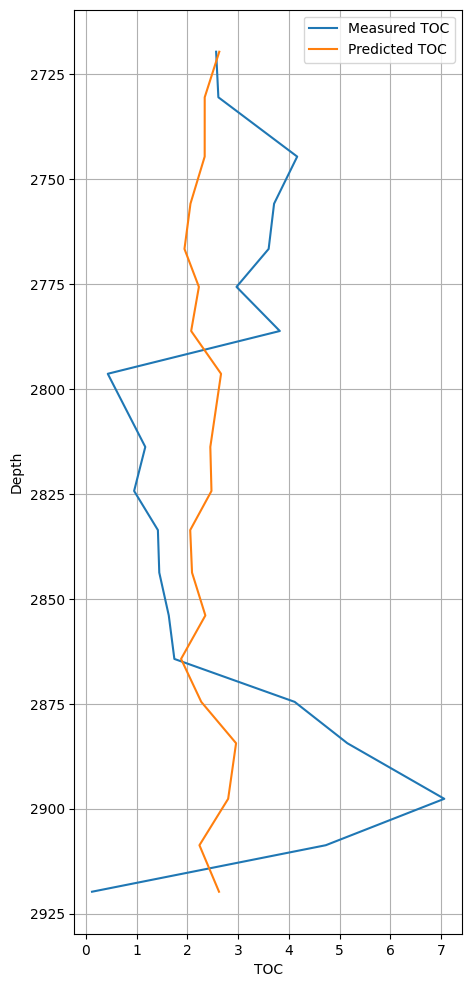

In [47]:
plt.plot(blind['TOC'],blind['MEDIAN'],label="Measured TOC")
plt.plot(y_pred_CNN_1,blind['MEDIAN'],label="Predicted TOC")
plt.legend()
plt.gca().invert_yaxis()
plt.grid()
plt.xlabel("TOC")
plt.ylabel("Depth")
plt.legend()
fig = plt.gcf()
fig.set_size_inches(5, 12)
# fig.savefig('Vp_pred_6.png', dpi=100)

In [48]:
# TOC_pred_1 = rf_reg.predict(blind)
# print_evaluate(blind_toc, TOC_pred_1)

# from scipy.stats import pearsonr
# corr, _ = pearsonr(blind_toc, TOC_pred_1)
# print('Pearsons correlation: %.3f' % corr)

In [49]:
# plt.subplot(1, 6, 1)
# plt.plot(blind_toc,blind_with_well,label="Measured TOC")
# plt.plot(TOC_pred_1,blind_with_well,label="Predicted TOC")
# plt.legend()
# plt.gca().invert_yaxis()

# # plt.gca().set_ylim([4.2, 1])
# # plt.gca().set_xlim([0, 6])
# plt.grid()
# plt.xlabel("TOC")
# plt.ylabel("Depth")
# plt.legend(fontsize=6)
# plt.title("RF Reg")

# plt.subplot(1, 6, 2)
# plt.plot(blind_toc,blind_with_well,label="Measured TOC")
# plt.plot(TOC_pred_2,blind_with_well,label="Predicted TOC")
# plt.legend()
# plt.gca().invert_yaxis()

# # plt.gca().set_ylim([4.2, 1])
# # plt.gca().set_xlim([0, 6])
# plt.grid()
# plt.xlabel("TOC")
# # plt.ylabel("Depth")
# plt.legend(fontsize=6)
# plt.title("SVM Reg")

# plt.subplot(1, 6, 3)
# plt.plot(blind_toc,blind_with_well,label="Measured TOC")
# plt.plot(TOC_pred_3,blind_with_well,label="Predicted TOC")
# plt.legend()
# plt.gca().invert_yaxis()

# # plt.gca().set_ylim([4.2, 1])
# # plt.gca().set_xlim([0, 6])
# plt.grid()
# plt.xlabel("TOC")
# # plt.ylabel("Depth")
# plt.legend(fontsize=6)
# plt.title("XGB Reg")

# # plt.subplot(1, 6, 4)
# # plt.plot(blind_toc,blind_with_well,label="Measured TOC")
# # plt.plot(TOC_pred_4,blind_with_well,label="Predicted TOC")
# # plt.legend()
# # plt.gca().invert_yaxis()

# # # plt.gca().set_ylim([4.2, 1])
# # # plt.gca().set_xlim([0, 6])
# # plt.grid()
# # plt.xlabel("TOC")
# # # plt.ylabel("Depth")
# # plt.legend(fontsize=6)
# # plt.title("ELM Reg")

# # plt.subplot(1, 6, 5)
# # plt.plot(blind_toc,blind_with_well,label="Measured TOC")
# # plt.plot(TOC_pred_5,blind_with_well,label="Predicted TOC")
# # plt.legend()
# # plt.gca().invert_yaxis()

# # # plt.gca().set_ylim([4.2, 1])
# # # plt.gca().set_xlim([0, 6])
# # plt.grid()
# # plt.xlabel("TOC")
# # # plt.ylabel("Depth")
# # plt.legend(fontsize=6)
# # plt.title("AutoML Reg #1")

# # plt.subplot(1, 6, 6)
# # plt.plot(blind_toc,blind_with_well,label="Measured TOC")
# # plt.plot(TOC_pred_6,blind_with_well,label="Predicted TOC")
# # plt.legend()
# # plt.gca().invert_yaxis()

# # # plt.gca().set_ylim([4.2, 1])
# # # plt.gca().set_xlim([0, 6])
# # plt.grid()
# # plt.xlabel("TOC")
# # # plt.ylabel("Depth")
# # plt.legend(fontsize=6)
# # plt.title("AutoML Reg #2")

# plt.subplots_adjust(wspace=0.5)
# fig = plt.gcf()
# fig.set_size_inches(15, 6)

In [50]:
y_pred_CNN_1

array([[2.628581 ],
       [2.3413   ],
       [2.340777 ],
       [2.0605414],
       [1.9422626],
       [2.2265162],
       [2.074077 ],
       [2.6631453],
       [2.4518216],
       [2.4744892],
       [2.0557106],
       [2.0913486],
       [2.354298 ],
       [1.875267 ],
       [2.273296 ],
       [2.959271 ],
       [2.8035638],
       [2.2375476],
       [2.6231291]], dtype=float32)

In [51]:
# blind['Depth'] = blind_with_well

In [52]:
# blind['TOC_meas'] = blind_toc
blind['TOC_CNN2'] = y_pred_CNN_1

In [9]:
blind

,MEDIAN,S1,S2,S3,HI,OI,PI,DPHI_DOL,DPHI_LIM,DPHI_SAN,NPHI_DOL,NPHI_LIM,U,TH,RhoB,GR,Vp,Vs,AI,SI,TOC,Well,TOC_CNN2
0,2719.635,1.21,1.19,0.56,46.0,22.0,0.504167,0.1085,0.0355,0.0004,0.1699,0.1917,6.3451,8.9519,2649.3364,147.6092,3634.621661,2111.530179,9.629335e+06,5.594154e+06,2.566206,MxAdam,2.628581
1,2730.490,1.31,1.28,0.60,49.0,23.0,0.505792,0.1307,0.0596,0.0254,0.1060,0.1202,8.2034,8.9172,2608.1497,150.7070,3953.996047,2472.135938,1.031261e+07,6.447701e+06,2.610470,MxAdam,2.341300
2,2744.625,2.41,1.51,0.62,36.0,15.0,0.614796,0.1433,0.0732,0.0395,0.0550,0.0644,7.8821,5.8507,2584.8320,125.6950,4342.533860,2642.301127,1.122472e+07,6.829905e+06,4.163889,MxAdam,2.340777
3,2755.845,0.92,0.75,0.44,20.0,12.0,0.550898,0.1754,0.1079,0.0755,0.0679,0.0781,19.9152,7.7951,2525.4788,233.4248,4013.859053,2419.537670,1.013692e+07,6.110491e+06,3.708333,MxAdam,2.060541
4,2766.620,0.71,0.62,0.32,17.0,9.0,0.533835,0.2028,0.1375,0.1062,0.0874,0.0996,16.7217,7.8286,2474.8040,204.8335,3900.449605,2497.567369,9.652848e+06,6.180990e+06,3.601307,MxAdam,1.942263
5,2775.660,3.15,1.38,0.54,47.0,18.0,0.695364,0.1763,0.1088,0.0764,0.0702,0.0812,9.4899,6.0992,2523.9002,138.4164,3982.048923,2490.230824,1.005029e+07,6.285094e+06,2.968085,MxAdam,2.226516
6,2786.180,0.54,0.53,0.27,14.0,7.0,0.504673,0.1675,0.0993,0.0666,0.1518,0.1713,16.1661,9.3072,2540.1506,187.0911,3619.482371,2237.216044,9.194030e+06,5.682866e+06,3.821429,MxAdam,2.074077
7,2796.370,0.71,0.53,0.53,123.0,123.0,0.572581,0.0398,-0.0388,-0.0766,0.1250,0.1414,1.6146,9.9950,2776.3481,107.1218,4289.936196,2405.700162,1.191036e+07,6.679061e+06,0.430894,MxAdam,2.663145
8,2813.800,0.53,0.36,0.46,31.0,39.0,0.595506,0.0868,0.0120,-0.0239,0.1144,0.1295,2.7682,9.9455,2689.3870,120.8134,4065.435626,2306.546486,1.093353e+07,6.203196e+06,1.170389,MxAdam,2.451822
9,2824.295,0.75,0.43,0.34,45.0,36.0,0.635593,0.0652,-0.0114,-0.0482,0.0375,0.0451,1.1134,4.0273,2729.4438,51.5486,5121.956341,2879.384871,1.398009e+07,7.859119e+06,0.950000,MxAdam,2.474489


In [55]:
# blind_data_save = blind
# blind_data_save.to_csv('TOC_Pred_McAdam_CNN2.csv', index=False)

In [10]:
# blind = pd.read_csv('TOC_Pred_McAdam_CNN2.csv')
# blind

In [11]:
blind.rename(columns = {'TOC_CNN3':'TOC_CNN2'}, inplace = True)

In [12]:
blind

In [13]:
blind_data_save = blind
blind_data_save.to_csv('TOC_Pred_McAdam_CNN2.csv', index=False)